In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [23]:
df= pd.read_pickle("../data/clean_rows_df.pkl")  
df.head()

In [3]:
df.dtypes

VoltageCurve            object
CurrentCurve            object
spotName                object
TimeStamp       datetime64[ns]
dtype: object

In [3]:
#imposto TimeStamp come indice
df=df.set_index(['TimeStamp'])

Gestione del -1 in VoltageCurve o CurrentCurve come Error

In [4]:
#creo una colonna Error per cui avrò True quanto i valori di Voltage o Current sono pari a -1
df['Error'] = df['CurrentCurve'].apply(lambda x: True if x==[-1] else False)

In [19]:
# numerosità degli errori
print(len((df[df["Error"]==True])))
#percntuale dati con errore sul totale
round(len((df[df["Error"]==True]))/len(df),4)*100

34980


19.74

In [7]:
#percentuale di -1 per mese e anno
df["Error"][df["Error"]==True].groupby([df[df["Error"]==True].index.year.rename("anno"),df[df["Error"]==True].index.month.rename("mese")]).count()/len(df[df["Error"]==True])

anno  mese
2019  11      0.152087
      12      0.237364
2020  1       0.238308
      2       0.215838
      3       0.143911
      5       0.012493
Name: Error, dtype: float64

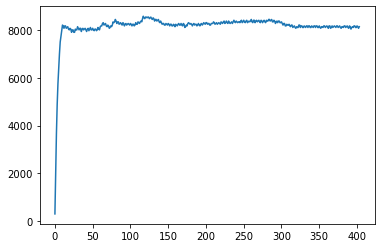

In [23]:
plt.plot(df["CurrentCurve"][28])

In [31]:
from statistics import mean

In [34]:
max(df["CurrentCurve"][1])

7696